In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Iris.csv', 'database.sqlite']


In [2]:
# Read the data
df = pd.read_csv("../input/Iris.csv")

# Drop the id column
df = df.drop(['Id'],axis=1)

# Create training set by dropping the classification labels
df_train = df.drop(['Species'],axis=1)
train_data = df_train.values

#Extract the classification labels
class_labels = df['Species'].values

print(df_train.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [3]:
# Preprocessing : Standardize the training dataset
train_data_scaled = preprocessing.scale(train_data)

from sklearn.model_selection import train_test_split

# Split the data into a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(train_data_scaled, class_labels, random_state=0)




In [4]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

We are now going to try out different classification algorithms to classify the correct Iris species

Confusion matrix, without normalization
[[50  0  0]
 [ 0 43  7]
 [ 0  4 46]]
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  1  8]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


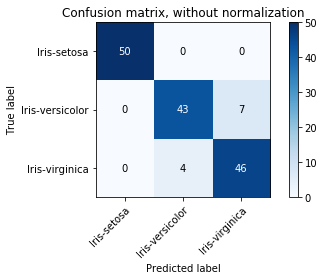

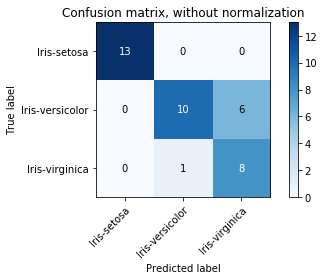

In [5]:
# Logistic regression
from sklearn.linear_model import LogisticRegression


LogReg = LogisticRegression()
LogReg.fit(train_data_scaled, class_labels)

Y = LogReg.predict(train_data_scaled)

C = plot_confusion_matrix(class_labels,Y)

# Train/Test 
LogReg_TT = LogisticRegression()
LogReg_TT.fit(X_train,y_train)
Y_Pred = LogReg_TT.predict(X_test)

C = plot_confusion_matrix(y_test,Y_Pred)

Confusion matrix, without normalization
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


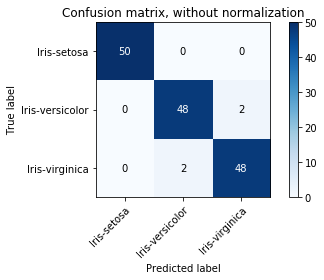

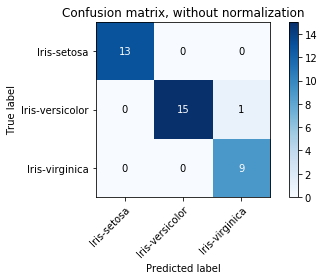

In [6]:
#SVM RBF
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

svc=SVC()
svc.fit(train_data_scaled, class_labels)
pred=svc.predict(train_data_scaled)
d = plot_confusion_matrix(class_labels,pred)

#Train/Test
svc_TT = SVC()
svc_TT.fit(X_train,y_train)
Y_Pred = svc_TT.predict(X_test)

C = plot_confusion_matrix(y_test,Y_Pred)



Confusion matrix, without normalization
[[49  1  0]
 [ 0 41  9]
 [ 0  7 43]]
Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


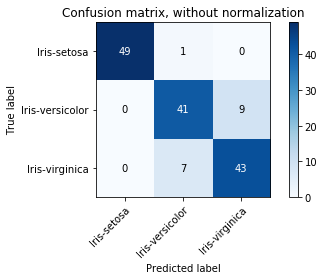

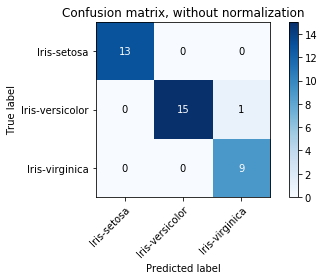

In [7]:
#SVM linear

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

svc=SVC(kernel='sigmoid')
svc.fit(train_data_scaled, class_labels)
pred=svc.predict(train_data_scaled)
d = plot_confusion_matrix(class_labels,pred)

#Train/Test
svc_TT = SVC()
svc_TT.fit(X_train,y_train)
Y_Pred = svc_TT.predict(X_test)

C = plot_confusion_matrix(y_test,Y_Pred)

Confusion matrix, without normalization
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


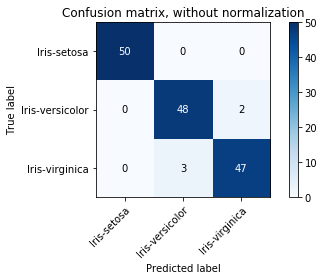

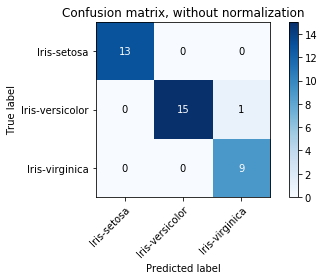

In [8]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
#nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_data_scaled)
#distance, indices = nbrs.kneighbors(train_data_scaled)
#distance

knn.fit(train_data_scaled,class_labels)
pred_knn= knn.predict(train_data_scaled)
d = plot_confusion_matrix(class_labels,pred_knn)

#Train/Test
knn_TT = KNeighborsClassifier(n_neighbors=7)
knn_TT.fit(X_train,y_train)
Y_Pred = knn_TT.predict(X_test)

C = plot_confusion_matrix(y_test,Y_Pred)



/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix, without normalization
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


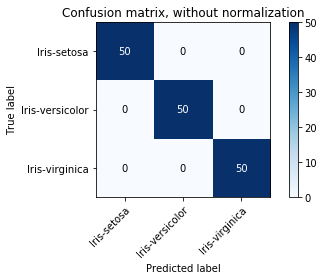

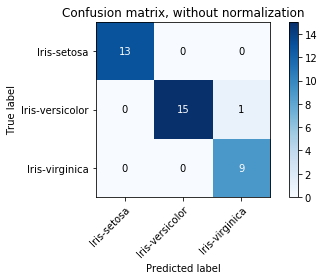

In [9]:
#random Forest

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier( max_depth=6)
rf.fit(train_data_scaled,class_labels)
pred_rf= rf.predict(train_data_scaled)
d = plot_confusion_matrix(class_labels,pred_rf)

#Train/Test
rf_TT=RandomForestClassifier(max_depth=6)
rf_TT.fit(X_train,y_train)
Y_Pred = rf_TT.predict(X_test)

C = plot_confusion_matrix(y_test,Y_Pred)
